## Resolvendo a equação de Schrödinger, reduzida e dependente do tempo

 A Equação de Schrödinger como uma equação matricial:

Escrevendo a matriz para $\mathbf{H}$, obtemos:


$$\mathbf{H}=\frac{-\hbar^{2}}{2mh^{2}}
\begin{pmatrix} -2 & 1 & 0 & 0 & \ldots \\
1 & -2 & 1 & 0 & \ldots  \\
0 & 1 & -2 & 1 & \ldots \\
\ddots & \ddots &  \ddots & \ddots & \vdots \\ 
\ldots & \ldots & \ldots & 1 & -2 & \text{}
\end{pmatrix} + \begin{pmatrix} V_{0} & 0 & 0 & \ldots & \vdots \\
0 & V_{1} & 0 & \ldots & \vdots \\
0 & 0 & V_{2} & \ldots & \vdots \\
\ddots & \ddots &  \ddots & \ddots & \vdots \\
\ldots & \ldots & \ldots & \text{} & V_{N-1} & \text{} \end{pmatrix}$$

In [1]:
#BibliotecAs
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh 

In [2]:
#Constantes físicas
hbar = 1.,0   #Constante de Planck reduzida
m = 1.0       #Massa da partícula
#Parâmetros do poitencial infinito
a=1.0         #Largura do poço
V0 = 10.0     #Profundidade do poço

In [3]:
#Função que calcula o potencial
def potencial(x):
    potencial = np.zeros_like(x)
    potencial[(x< -a/2) | (x>a/2)] = V0
    return potencial
#Função para, numericamente resolver a eqS
def solve_schrodinger(N,L,V_func):
    """
    N - quantidade de acrescimos em x
    L - largura do potencial
    V_f - função Potencial
    """
     #1. Definir grade e potencial
    x = np.linspace(-L/2, L/2, N)
    dx = x[1] - x[0]
    V = V_func(x)
    #2. Construir a matriz hamiltoniana
    #Termo cinético
    main_diag = 1/(m*dx**2) * np.ones(N)
    off_diag = -1/(2*m*dx**2) * np.ones(N-1)
    H = np.diag(main_diag) + np.diag(off_diag, 1) + np.diag(off_diag, -1)
    #Termo potencial
    H += np.diag(V)
    #3. Diagonalizar a matriz hamiltoniana
    energia, psi = eigh(H)  # diagonaliza a matriz e calcula autovalores (energia) e autovetores (psi)
    #Normalizar as funções de onda
    for i in range(psi.shape[1]):
        psi[:,i] /= np.sqrt(np.sum(psi[:,i]**2) * dx) 
    return x, energia, psi    

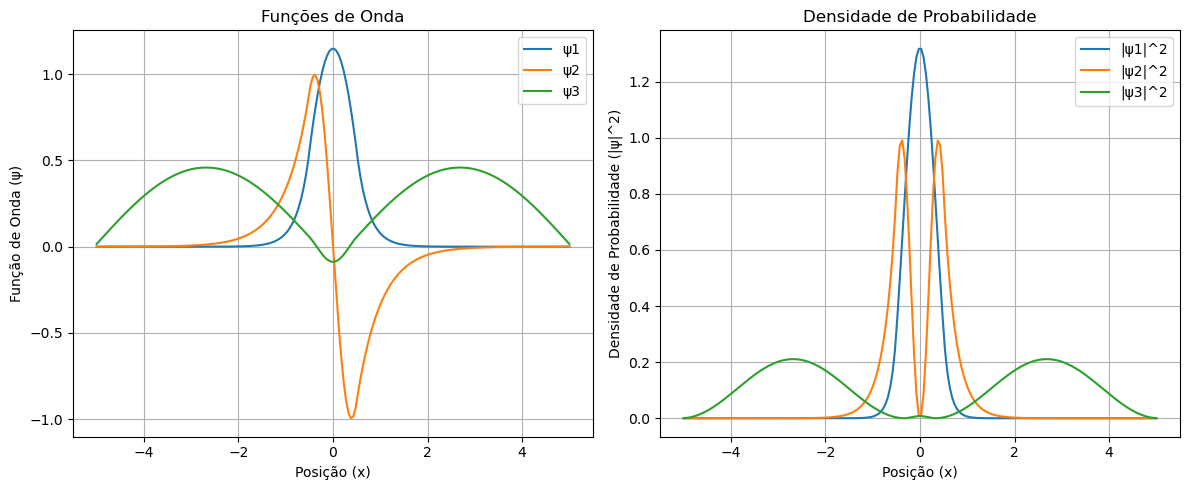

Energias calculadas:
E1 = 2.2709
E2 = 8.0735
E3 = 10.2202


In [4]:

# Parâmetros da simulação
N = 200  # Número de pontos na grade
L = 10.0 # Comprimento da caixa

# Resolver a equação de Schrödinger
x, energia, psi = solve_schrodinger(N, L, potencial)

# Plotar os resultados
plt.figure(figsize=(12, 5))

# Plotar as primeiras 3 funções de onda
for i in range(min(3, psi.shape[1])):  # Plota até o número de funções de onda encontradas
    plt.subplot(1, 2, 1)
    plt.plot(x, psi[:, i], label=f"ψ{i+1}")
    plt.title("Funções de Onda")
    plt.xlabel("Posição (x)")
    plt.ylabel("Função de Onda (ψ)")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(x, psi[:, i]**2, label=f"|ψ{i+1}|^2")
    plt.title("Densidade de Probabilidade")
    plt.xlabel("Posição (x)")
    plt.ylabel("Densidade de Probabilidade (|ψ|^2)")
    plt.legend()
    plt.grid(True)
    
plt.tight_layout()
plt.show()

print("Energias calculadas:")
for i, E in enumerate(energia[:min(3, psi.shape[1])]): # Imprime as primeiras 3 energias
    print(f"E{i+1} = {E:.4f}")